In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pip install -q tensorflow_hub

In [0]:
from __future__ import absolute_import, division, print_function

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras import layers

tf.VERSION

W0413 16:41:53.043297 140699097388928 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


'1.13.1'

In [0]:
#Load the VGG model
#from keras.applications import VGG16

#Load the Inception-V3 model
from keras.applications.inception_v3 import InceptionV3

image_size = 299
Inception_v3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))


In [0]:
# Freeze the layers except the last 4 layers
for layer in Inception_v3.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in Inception_v3.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7ff6a1ade0b8> False
<keras.layers.convolutional.Conv2D object at 0x7ff6a1ac9d68> False
<keras.layers.normalization.BatchNormalization object at 0x7ff6a1b48ef0> False
<keras.layers.core.Activation object at 0x7ff6a1b48550> False
<keras.layers.convolutional.Conv2D object at 0x7ff6a1af1eb8> False
<keras.layers.normalization.BatchNormalization object at 0x7ff6a1aa0dd8> False
<keras.layers.core.Activation object at 0x7ff6a1a54630> False
<keras.layers.convolutional.Conv2D object at 0x7ff6a19ee668> False
<keras.layers.normalization.BatchNormalization object at 0x7ff6a195e7f0> False
<keras.layers.core.Activation object at 0x7ff6a19147b8> False
<keras.layers.pooling.MaxPooling2D object at 0x7ff6a18f5898> False
<keras.layers.convolutional.Conv2D object at 0x7ff6a18d2e80> False
<keras.layers.normalization.BatchNormalization object at 0x7ff6a1d633c8> False
<keras.layers.core.Activation object at 0x7ff6a1d63438> False
<keras.layers.convolutional.Conv

In [0]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(Inception_v3)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 8, 8, 2048)        21802784  
_________________________________________________________________
flatten_2 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              134218752 
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 4100      
Total params: 156,025,636
Trainable params: 134,222,852
Non-trainable params: 21,802,784
_________________________________________________________________


In [0]:
data_train= '/content/drive/My Drive/maps/train'
data_test = '/content/drive/My Drive/maps/test'


In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 32
val_batchsize = 32
 
train_generator = train_datagen.flow_from_directory(
        str(data_train),
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

for image_batch,label_batch in train_generator:
  print("Image batch shape: ", image_batch.shape)
  print("Labe batch shape: ", label_batch.shape)
  break
  


Found 360 images belonging to 4 classes.
Image batch shape:  (32, 299, 299, 3)
Labe batch shape:  (32, 4)


In [0]:
test_generator = validation_datagen.flow_from_directory(
        str(data_test),
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)
for image_batch,label_batch in test_generator :
  print("Image batch shape: ", image_batch.shape)
  print("Labe batch shape: ", label_batch.shape)
  break

Found 40 images belonging to 4 classes.
Image batch shape:  (32, 299, 299, 3)
Labe batch shape:  (32, 4)


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples//train_generator.batch_size ,
      epochs=30,
      validation_data=test_generator,
      validation_steps=test_generator.samples//test_generator.batch_size,
      verbose=1)
 
# Save the model
model.save('small_last4.h5')

Epoch 1/30
11/11 [==============================] - 26s 2s/step - loss: 9.7681 - acc: 0.2893 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 2/30
11/11 [==============================] - 16s 1s/step - loss: 10.4164 - acc: 0.2926 - val_loss: 7.5195 - val_acc: 0.4062
Epoch 3/30
11/11 [==============================] - 15s 1s/step - loss: 8.3760 - acc: 0.4143 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 4/30
11/11 [==============================] - 17s 2s/step - loss: 8.4109 - acc: 0.3965 - val_loss: 6.3116 - val_acc: 0.5312
Epoch 5/30
11/11 [==============================] - 15s 1s/step - loss: 8.2921 - acc: 0.3885 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 6/30
11/11 [==============================] - 17s 2s/step - loss: 7.3893 - acc: 0.4428 - val_loss: 4.5309 - val_acc: 0.5312
Epoch 7/30
11/11 [==============================] - 16s 1s/step - loss: 7.5980 - acc: 0.4337 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 8/30
11/11 [==============================] - 16s 1s/step - los

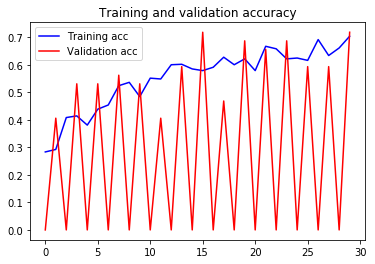

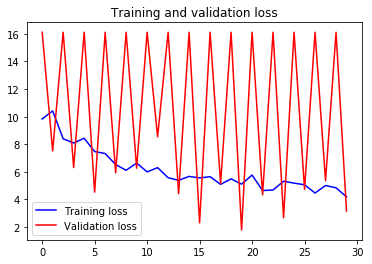

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()